# Website A/B Testing - Lab

## Introduction

In this lab, you'll get another chance to practice your skills at conducting a full A/B test analysis. It will also be a chance to practice your data exploration and processing skills! The scenario you'll be investigating is data collected from the homepage of a music app page for audacity.

## Objectives

You will be able to:
* Analyze the data from a website A/B test to draw relevant conclusions
* Explore and analyze web action data

## Exploratory Analysis

Start by loading in the dataset stored in the file 'homepage_actions.csv'. Then conduct an exploratory analysis to get familiar with the data.

> Hints:
    * Start investigating the id column:
        * How many viewers also clicked?
        * Are there any anomalies with the data; did anyone click who didn't view?
        * Is there any overlap between the control and experiment groups? 
            * If so, how do you plan to account for this in your experimental design?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

In [3]:
df = pd.read_csv('homepage_actions.csv')
df

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view
...,...,...,...,...
8183,2017-01-18 09:11:41.984113,192060,experiment,view
8184,2017-01-18 09:42:12.844575,755912,experiment,view
8185,2017-01-18 10:01:09.026482,458115,experiment,view
8186,2017-01-18 10:08:51.588469,505451,control,view


In [4]:
df["action"].value_counts()

view     6328
click    1860
Name: action, dtype: int64

In [5]:
df.groupby("group")["id"].count()

group
control       4264
experiment    3924
Name: id, dtype: int64

In [6]:
df.groupby("group")["action"].value_counts()

group       action
control     view      3332
            click      932
experiment  view      2996
            click      928
Name: action, dtype: int64

In [7]:
df["click"] = 0
df.loc[df['action'] == "click", "click"] = 1

In [8]:
# Getting both records of duplicates
duplicates = df[df.duplicated(subset = "id", keep = False)]
duplicates

# Set both as 1
df.loc[df["id"].isin(duplicates["id"]), "click"] = 1
df.drop_duplicates(subset = "id", inplace = True)

In [9]:
df_experiment = df.query("group =='experiment'")
df_experiment

,timestamp,id,group,action,click
0,2016-09-24 17:42:27.839496,804196,experiment,view,0
1,2016-09-24 19:19:03.542569,434745,experiment,view,0
2,2016-09-24 19:36:00.944135,507599,experiment,view,0
4,2016-09-24 20:26:14.466886,536734,experiment,view,0
5,2016-09-24 20:32:25.712659,681598,experiment,view,0
...,...,...,...,...,...
8176,2017-01-18 07:07:50.090346,540466,experiment,view,0
8179,2017-01-18 08:53:50.910310,615849,experiment,view,1
8183,2017-01-18 09:11:41.984113,192060,experiment,view,0
8184,2017-01-18 09:42:12.844575,755912,experiment,view,0


In [10]:
df_control = df.query("group =='control'")
df_control

,timestamp,id,group,action,click
3,2016-09-24 19:59:02.646620,671993,control,view,0
9,2016-09-24 21:00:12.278374,560027,control,view,0
23,2016-09-25 00:25:14.141290,281985,control,view,0
24,2016-09-25 01:14:48.603202,407864,control,view,0
25,2016-09-25 02:16:11.046654,342984,control,view,0
...,...,...,...,...,...
8177,2017-01-18 07:15:05.620801,839581,control,view,0
8178,2017-01-18 08:17:12.675797,616692,control,view,0
8181,2017-01-18 09:07:37.661143,795585,control,view,1
8186,2017-01-18 10:08:51.588469,505451,control,view,0


C:\Users\nrmmw\AppData\Local\Temp\ipykernel_21380\279304706.py:3: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.kdeplot(data = df_experiment[df_experiment["click"] == 0], label = "experiment", palette = ["red"])
C:\Users\nrmmw\AppData\Local\Temp\ipykernel_21380\279304706.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = df_experiment[df_experiment["click"] == 0], label = "experiment", palette = ["red"])
C:\Users\nrmmw\AppData\Local\Temp\ipykernel_21380\279304706.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = df_control[df_control["click"] == 0], label = "control")


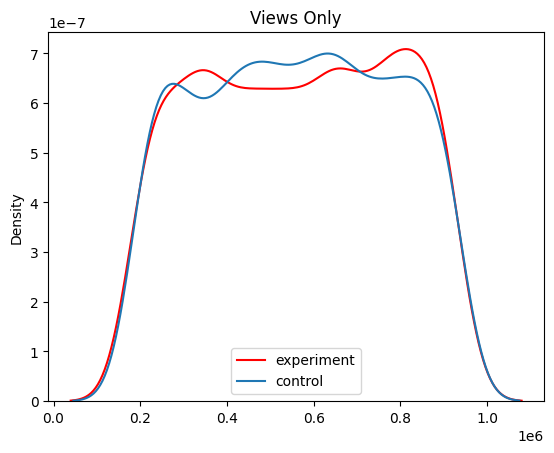

In [11]:
# Analyzing Views_ Only
plt.title("Views Only")
sns.kdeplot(data = df_experiment[df_experiment["click"] == 0], label = "experiment", palette = ["red"])
sns.kdeplot(data = df_control[df_control["click"] == 0], label = "control")
plt.legend();

C:\Users\nrmmw\AppData\Local\Temp\ipykernel_21380\3860058494.py:3: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.kdeplot(data = df_experiment[df_experiment["click"] == 1], label = "experiment", palette = ["red"])
C:\Users\nrmmw\AppData\Local\Temp\ipykernel_21380\3860058494.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = df_experiment[df_experiment["click"] == 1], label = "experiment", palette = ["red"])
C:\Users\nrmmw\AppData\Local\Temp\ipykernel_21380\3860058494.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = df_control[df_control["click"] == 1], label = "control")


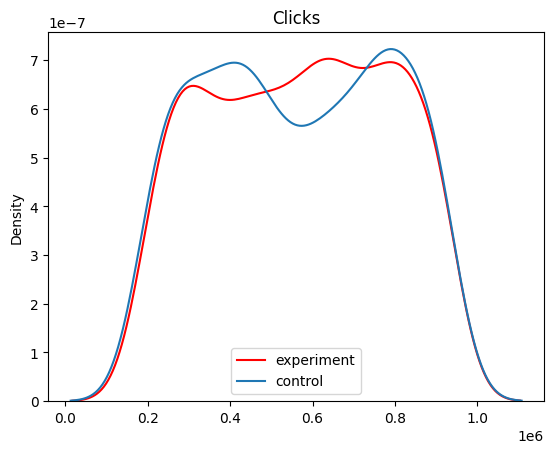

In [12]:
# Analyzing Clicks
plt.title("Clicks")
sns.kdeplot(data = df_experiment[df_experiment["click"] == 1], label = "experiment", palette = ["red"])
sns.kdeplot(data = df_control[df_control["click"] == 1], label = "control")
plt.legend();

## Conduct a Statistical Test

Conduct a statistical test to determine whether the experimental homepage was more effective than that of the control group.

In [13]:
# Chosen test: Chi-square as it is categorical
null_hypothesis = "The experimental homepage has equal interactions with the current homepage"
alternative_hypothesis = "The experimental homepage had more interactions than the control homepage"

- Experiment - Observed Results
- Control - Actual/Expected Results

In [14]:
experimental_views = (df_experiment["click"] == 0).sum()
experimental_clicks = (df_experiment["click"] == 1).sum()

control_views = (df_control["click"] == 0).sum()
control_clicks = (df_control["click"] == 1).sum()

In [16]:
# Figuring out those who clicked and those who did not and storing into an array
observations = np.array([experimental_clicks, experimental_views-experimental_clicks])
expected = np.array([control_clicks, control_views-control_clicks])

print(f"Observed/Experiment: {observations}")
print(f"Actuals/Control: {expected}")

Observed/Experiment: [ 928 1140]
Actuals/Control: [ 932 1468]


In [17]:
contingency_table = np.array([
        (observations[0], observations[1]),
        (expected[0], expected[1])])
contingency_table

array([[ 928, 1140],
       [ 932, 1468]], dtype=int64)

In [18]:
stats.chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=16.43491732898111, pvalue=5.0349180796555395e-05, dof=1, expected_freq=array([[ 860.89525515, 1207.10474485],
       [ 999.10474485, 1400.89525515]]))

In [19]:
experiment_percentage = (experimental_clicks/experimental_views) * 100
print(f"Experimental Clicks converted: {round(experiment_percentage,3)}%")
control_percentage = (control_clicks/control_views) * 100
print(f"Control Clicks converted: {round(control_percentage,3)}%")
print(f"Difference in percentages: {round(experiment_percentage - control_percentage, 3)}")

Experimental Clicks converted: 44.874%
Control Clicks converted: 38.833%
Difference in percentages: 6.041


### Analysis:

Does this result roughly match that of the previous statistical test?

> Comment: **Since the p_value is small, we reject the null hypothesis**

## Summary

In this lab, you continued to get more practice designing and conducting AB tests. This required additional work preprocessing and formulating the initial problem in a suitable manner. Additionally, you also saw how to verify results, strengthening your knowledge of binomial variables, and reviewing initial statistical concepts of the central limit theorem, standard deviation, z-scores, and their accompanying p-values.